# Case Study 1: Iris Species Prediction

**Problem Statement**: Create a model which can predict the species of an iris flower given its features

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
import pandas as pd

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_names'] = df['target'].map(dict(zip(range(len(iris.target_names)), iris.target_names)))
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


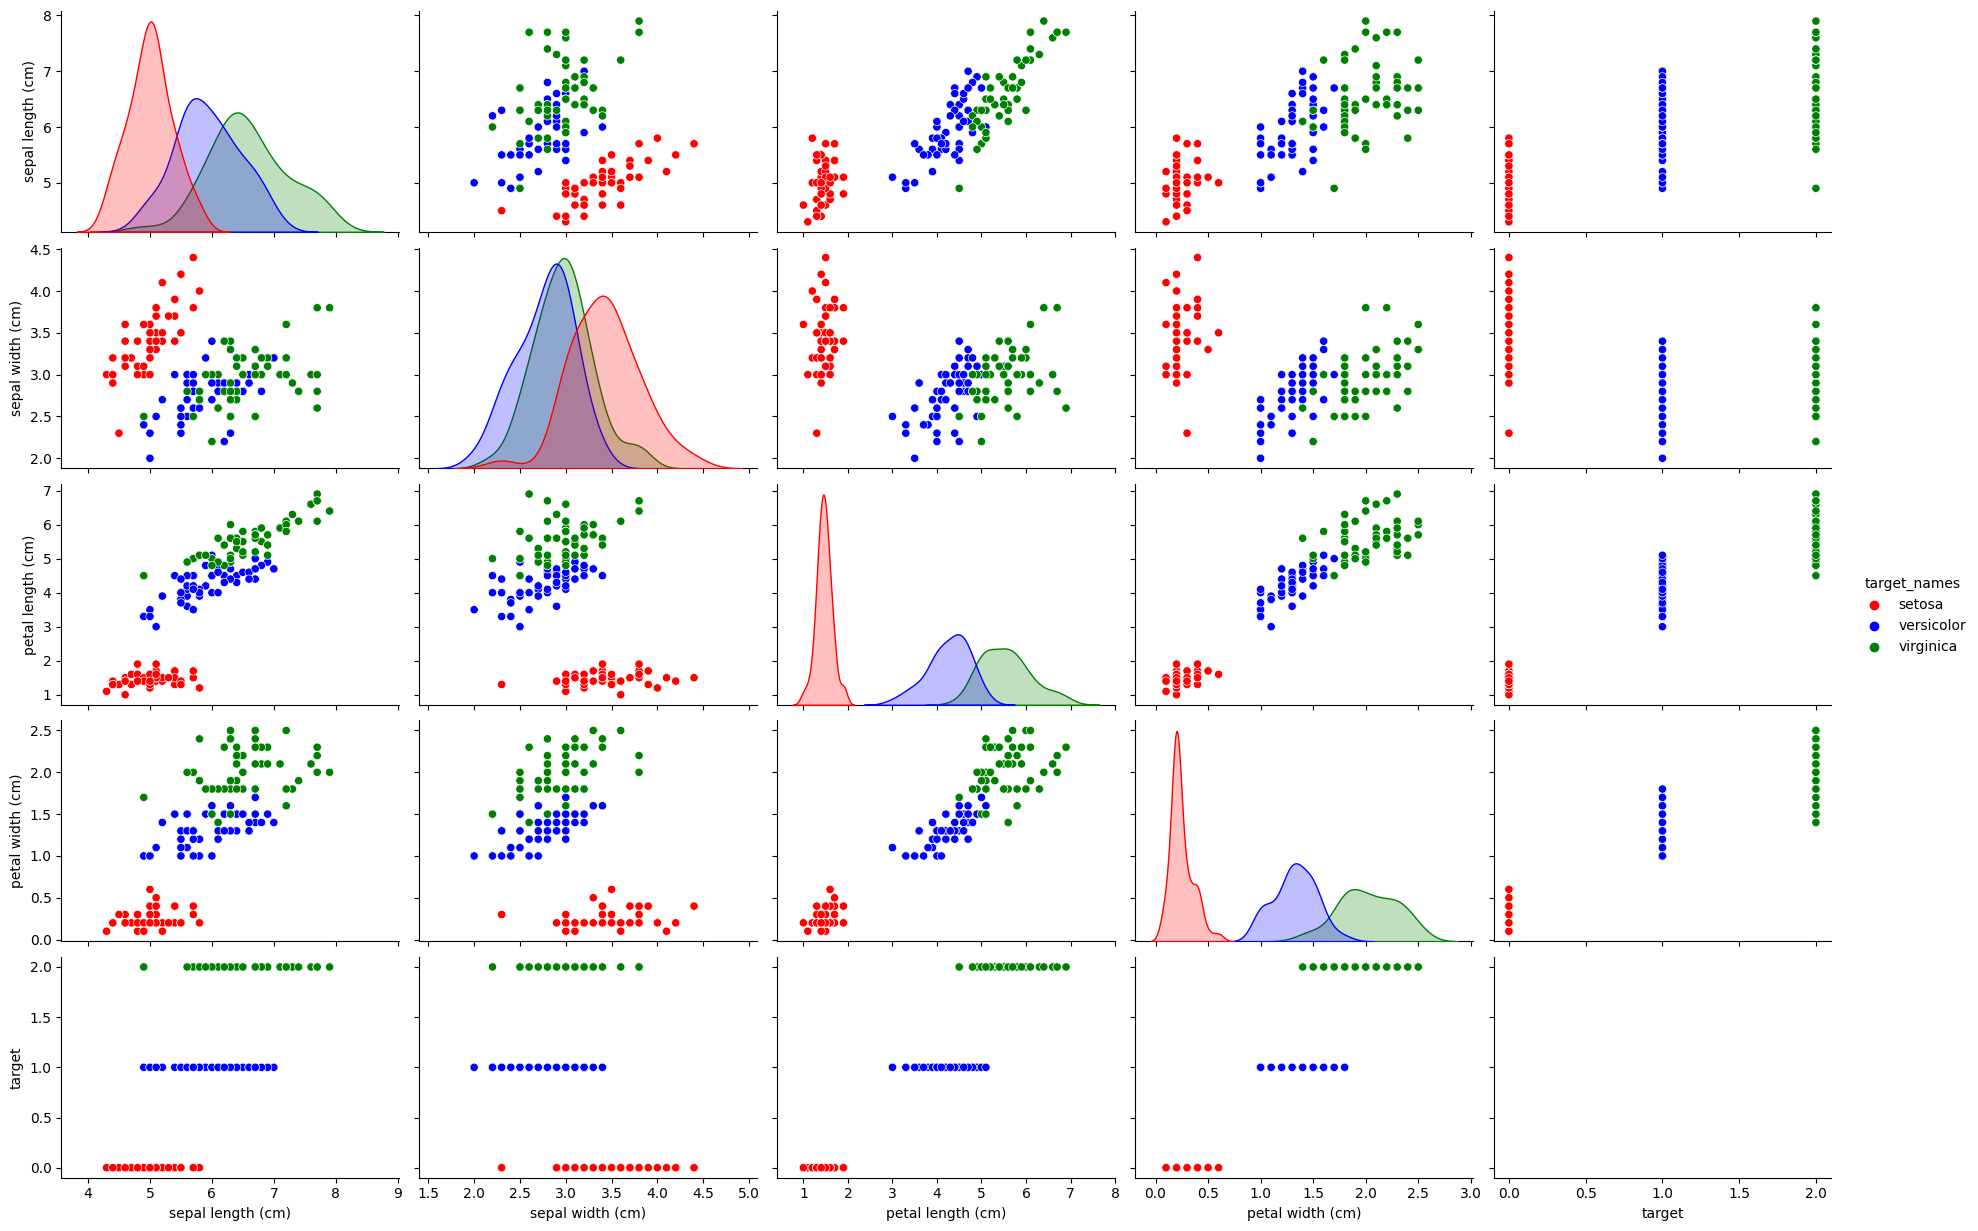

In [ ]:
import seaborn as sns
sns.pairplot(data=df, hue = "target_names", palette=["red", "blue", "green"], height=2.5, aspect=1.5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
X = df.drop(["target", "target_names"], axis=1)
Y = df["target"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
result = model.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(result, y_test)
print(f"The accuracy of the model is: {score*100:.2f}%")

The accuracy of the model is: 93.33%


In [ ]:
filename = "iris_model.sav"
with open(filename, "wb") as file:
    pickle.dump(model, file)

In [ ]:
!pip install streamlit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 30.6 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=49d3c695a38618f60ceb77879aa608a2a53c4e0ed61762096cf931096d2eaa85
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzloca

In [ ]:
%%writefile app.py

import streamlit as st
import pickle
# from streamlit_option_menu import option_menu
import pandas as pd
import numpy as np
import pickle

model = pickle.load(open("iris_model.sav", "rb"))

st.title("Iris Species Prediction Using ML")


col1, col2 = st.columns(2)

with col1:
    sl = st.text_input('Sepal Length')

with col2:
    sw = st.text_input('Sepal Width')

with col1:
    pl = st.text_input('Petal Length')

with col2:
    pw = st.text_input('Petal Width')


if st.button('Predict Species'):
    inputs = [sl, sw, pl, pw]
    inputs = [float(i) for i in inputs]
    features = np.asarray(inputs).reshape(1,-1)
    prediction = model.predict(features)

    if (prediction[0] == 0):
        alz_diagnosis = 'The species is Setosa'
        st.success(alz_diagnosis)
    elif (prediction[0] == 1):
        alz_diagnosis = 'The Species is Versicolor'
        st.success(alz_diagnosis)
    elif (prediction[0] == 2):
        alz_diagnosis = 'The Species is Virginica'
        st.success(alz_diagnosis)


Overwriting app.py


In [ ]:
# !streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]

In [ ]:
!npm install localtunnel --quiet

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.95s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
!streamlit run /content/app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.73.248.255
npx: installed 22 in 2.631s
your url is: https://lazy-dingos-study.loca.lt


# Case Study 2: Alzheimer Prediction

**Problem Statement**: Let us create a platform where people can predict if they are prone to Alzheimer disease using Machine Learning algorithms

dataset link: https://drive.google.com/file/d/1o9wUn5BFJTqYgZWMqVjrmEw3_mgXceQr/view?usp=sharing

Download the dataset and then upload it on the colab as shown:
<div align="center">
  <img
    width="320"
    src="https://drive.google.com/uc?id=17jnUKAPDG1Ma1TvTa8cHt9IgnmxPEGxf"
  >
</div>




## Data Reading and Preprocessing

In machine learning, data is of extreme importance, machine learning engineers need huge amount of data with good quality. Unfortunately getting data is a very tedious process and sometimes extremely costly.

The data available often turns out to have many redundancies, null values, etc. which are bad for training a good model. Therefore we need to preprocess the data.

Data path: Once you have uploaded the dataset (alzheimer.csv file) you can right click on it and copy path and use it to read the data using python libraries

In order to read the dataset in csv format you need to use **pandas** which is a python libraries for reading and manipulating dataframes.

In [ ]:
import pandas as pd
path = r'/content/alzheimer.csv'
data = pd.read_csv(path)
data.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


As you can see in the table above. These are the first 5 lines of the dataframe alzheimer.csv. You can change the number of rows to be displayed by putting it in the head() method. Try using data.head(10)

The **head** method gives you the top view of the dataframe there is also a **tail** method that gives the bottom view of dataframe.

### Getting insights about the data
Now that we have a simple look at the data. We at least know the rows and columns in the dataset.

**Problem statement target**: For this problem statement we want to create a machine learning model that will be able to predict the **Group** in which a patient may be in given other features

**Problem stateme features**: In the given dataframe, anything else other than the target can be (but not necessarily) considered as a feature.

Since we have already taken a look at the dataframe let us get some statistical ideas about the dataset.

In [ ]:
"""The data.describe() function is used to generate descriptive statistics of a pandas DataFrame or Series.
It provides a summary of the central tendency, dispersion, and shape of the distribution of the data. """

data.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


The describe method tells us about a general outline of the dataset columns. Number of entries (count), mean, standard deviation (std), minimum value, percentiles (25%, 50%, 75%) and maximum value.

In [ ]:
""" data.info() displays the data types of each column,
    allowing you to quickly assess whether the columns contain numeric,
    string, datetime, or other types of data. """

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


**Finding object classes**: The info tells us that **Group** and **M/F** are object type attributes, these can be random words (remarks) or classes. Let us find the classes available for each object column.

In [ ]:
# Classes for Group column
display(data["Group"].value_counts())

print()

# Classes for M/F column
display(data["M/F"].value_counts())

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

F    213
M    160
Name: M/F, dtype: int64

**Finding null values**: Null values in a dataset can be disastrous for training the model, we need to take care of the null values so that the model can be trained most optimally.

In [ ]:
print("Columns\t\tNull entries")
for col in data.columns: # check for null value in each column of the dataframe
  print(f"{col} \t\t {data[col].isna().sum()}")

Columns		Null entries
Group 		 0
M/F 		 0
Age 		 0
EDUC 		 0
SES 		 19
MMSE 		 2
CDR 		 0
eTIV 		 0
nWBV 		 0
ASF 		 0


Now we know that there are only two columns that contain null entries in the dataframe, SES(19) and MMSE(2).

Now there are various ways to handle the null values such as:
1.  Dropping rows
2.  Imputation with central tendency (replace null values with mean or median)
3.  Imputation with interpolation (Used for time based components)
4.  Indicator variables (Used for categorical variables)
5.  Machine learning based interpolation
6.  Domain specific interpolation

Which method we use depends on what kind of dataset are we using, since both of the columns with null values happen to be real valued (using data.info()) we can either drop the values (which we can fairly do with any type of dataset) or we can replace the null values with central values.

**Dropping**: Very simple we just remove the null values, but can be costly if we have to many rows that have null values.

Since we have two column of null values where one of them has 2 null entries and the other has 19, let us drop rows where MMSE is null and replace the null values with mean for SES column. You can also try removing all SES null values or replacing MMSE nulls with mean or simply discarding both columns!

In [ ]:
# Dropping rows where the MMSE column has null values

# First let us take a look where MMSE has null values
display(data[data["MMSE"].isna()])

# Now we will remove the rows with null values, notice that the two rows will also have null SES values
data.dropna(subset = ["MMSE"], inplace=True)
data.shape


,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
357,Demented,F,75,12,NaN,NaN,1.0,1169,0.742,1.501
358,Demented,F,77,12,NaN,NaN,1.0,1159,0.733,1.515


(371, 10)

In [ ]:
# Replace the null values for SES with mean

# First let us take a look where SES has null values
display(data[data["SES"].isna()])
print(data[data["SES"].isna()].shape)


,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,Demented,M,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,Demented,M,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,Demented,M,75,16,NaN,27.0,1.0,1372,0.710,1.279
134,Demented,F,80,12,NaN,30.0,0.5,1430,0.737,1.228
135,Demented,F,81,12,NaN,27.0,0.5,1453,0.721,1.208
207,Demented,F,80,12,NaN,27.0,0.5,1475,0.762,1.190
208,Demented,F,83,12,NaN,23.0,0.5,1484,0.750,1.183


(17, 10)


In [ ]:
# Replace null values with mean
mean_value = data['SES'].mean()
data['SES'].fillna(mean_value, inplace=True)

data.iloc[2:4,:]

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,Demented,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010


Now let us check null values again

In [ ]:
print("Columns\t\tNull entries")
for col in data.columns: # check for null value in each column of the dataframe
  print(f"{col} \t\t {data[col].isna().sum()}")

Columns		Null entries
Group 		 0
M/F 		 0
Age 		 0
EDUC 		 0
SES 		 0
MMSE 		 0
CDR 		 0
eTIV 		 0
nWBV 		 0
ASF 		 0


### Data Preprocessing
In the data that we have, there are columns where the input is string, but computers do not understand strings, so we will have to replace the strings with for object columns with labels to denote them. We will do this using LabelEncoder which is a module from scikit-learn library

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Sample Example
le = LabelEncoder()
le.fit(["apple", "orange", "banana", "mango", "orange"])

print("The classes are: ", le.classes_)

print(le.transform(["apple", "orange"]))

print(le.inverse_transform([0, 3]))


The classes are:  ['apple' 'banana' 'mango' 'orange']
[0 3]
['apple' 'orange']


### Preprocessing data Group and M/F columns

In [ ]:
 # Encoding Group
print("Encoding Group")
le1 = LabelEncoder()
le1.fit(data["Group"])
print(f"Classes in the Group column: {le1.classes_}")
grp = le1.transform(data["Group"])
# print("Encoded Group: ", grp)
data["Group"] = grp

# Encoding M/F
print("Encoding M/F")
le2 = LabelEncoder()
le2.fit(data["M/F"])
print(f"Classes in the M/F column: {le2.classes_}")
gender = le2.transform(data["M/F"])
# print("Encoded M/F", gender)
data["M/F"] = gender

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# data = data.apply(le.fit_transform)


Encoding Group
Classes in the Group column: ['Converted' 'Demented' 'Nondemented']
Encoding M/F
Classes in the M/F column: ['F' 'M']


In [ ]:
data.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,2,1,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,1,1,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,1,1,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,1,1,80,12,2.460452,22.0,0.5,1698,0.701,1.034


Now we that we have replaced the object values with corresponding integer values, and removed the null values this data can be used to train a machine learning model.

But before that let us try to get some insight about how the features of the dataset affect the result.

In [ ]:
data.groupby("Group").mean()

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,,,,,,,,,
0,0.351351,79.756757,15.459459,1.729730,28.675676,0.256757,1459.270270,0.723730,1.212405
1,0.597222,76.263889,13.694444,2.734914,24.513889,0.666667,1490.319444,0.716007,1.192569
2,0.321053,77.057895,15.142105,2.394737,29.226316,0.005263,1495.500000,0.740900,1.191063


In [ ]:
# le1.inverse_transform([0,1,2])

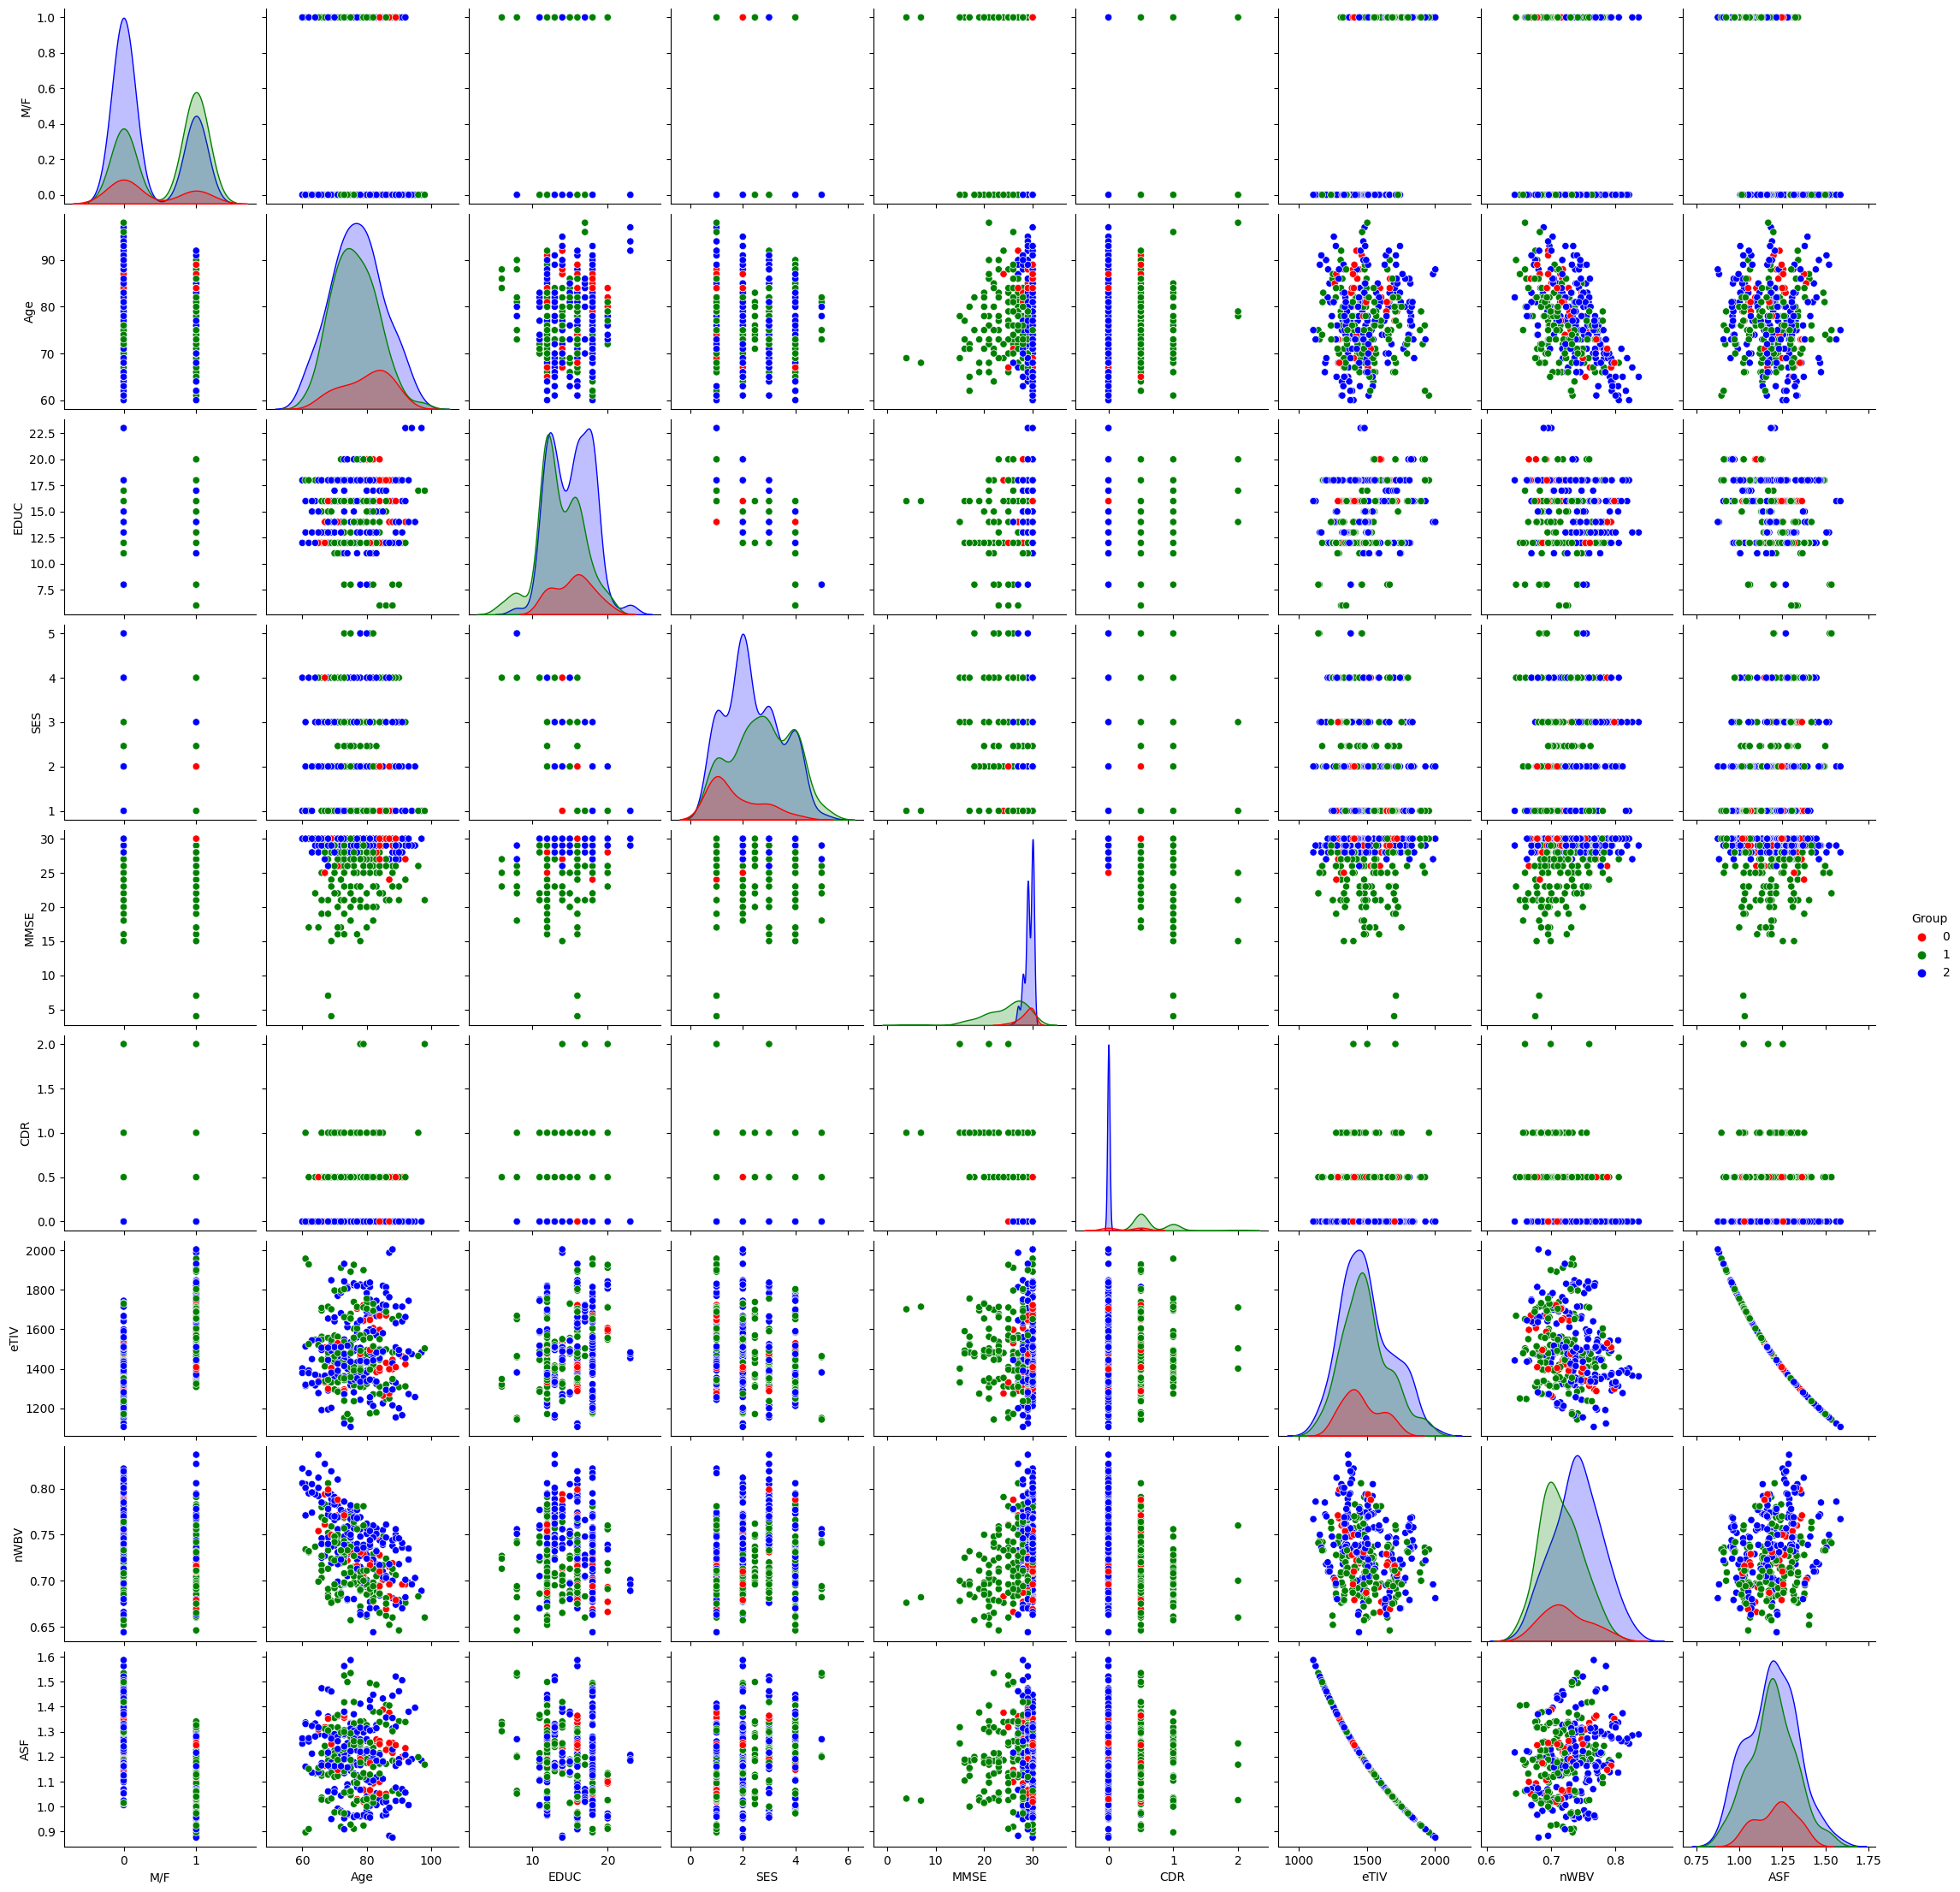

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
my_palette = ['red', 'green', 'blue']
sns.pairplot(data, hue="Group", palette = my_palette)

### Feature-Output Seperation and Train Test Split

Okay, now we are at the step where we have a data which can be used to train the model, we have also gained some insights, that show us how the features affect the result.

Now let split our data into two parts, one will be the features that will be given to the model as the input, and the other will be the output that we will be expecting from the model.

In [ ]:
X = data.drop(["Group"], axis = 1)  # The X dataframe will contain all the column except Group as that is not a feature but the output
Y = data["Group"] # The Y dataframe will contain Group column that is the output for each feature
print(X.shape)
print(Y.shape)

(371, 9)
(371,)


In [ ]:
X.head()

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,1,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,1,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,1,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,1,80,12,2.460452,22.0,0.5,1698,0.701,1.034


In [ ]:
Y.head()

0    2
1    2
2    1
3    1
4    1
Name: Group, dtype: int64

Notice that there are some columns where entries are large (AGE) while others have very small values(CDR, SES), this may cause error while training the model so we will have to scale the features into the same range.

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X)
# standardized_X = scaler.transform(X)
# X = standardized_X

# X

Now we will split the data into two parts train and test, the train part will be used to train the model and the test part will be used to test the performance of the model.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(259, 9) (259,)
(112, 9) (112,)


### Model Training and Testing

Now, it's time to train our model, since that output that we desire is classes, then we will be using a classification model the RandomForest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

## Training performance
Now let us predict how does the model perform for the same dataset that it was trained on

In [ ]:
from sklearn.metrics import accuracy_score
y_hat_train = model.predict(X_train)

Accuracy: 100.0 %


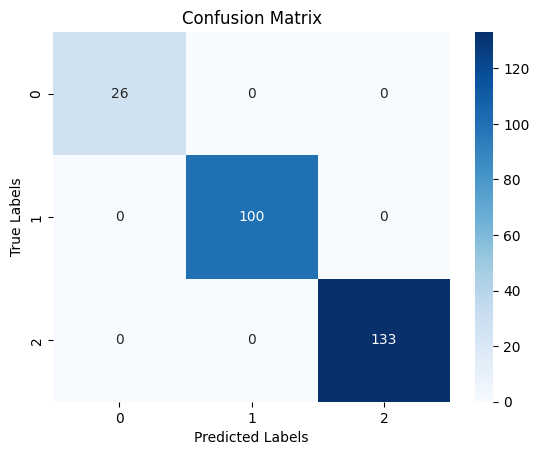

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split


# Calculate accuracy
accuracy = accuracy_score(y_train, y_hat_train)
print("Accuracy:", accuracy*100, "%")



# Calculate confusion matrix
cm = confusion_matrix(y_train, y_hat_train)
# print("Confusion Matrix:")
# print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## Testing Performance
Now let us see how the model works for the data that it has not seen before.

In [ ]:
le1.inverse_transform([0,1,2])

array(['Converted', 'Demented', 'Nondemented'], dtype=object)

In [ ]:
y_hat_test = model.predict(X_test)

Accuracy: 90.17857142857143 %


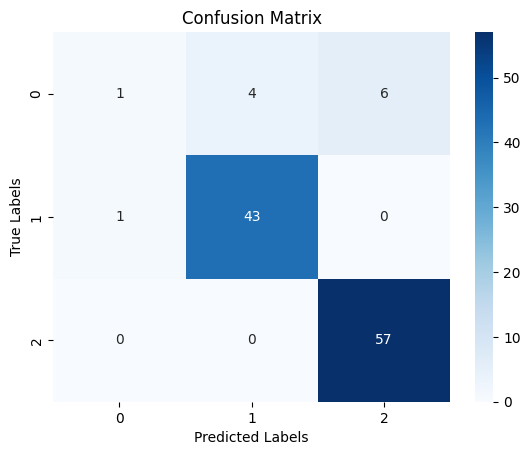

In [ ]:
accuracy = accuracy_score(y_test, y_hat_test)
print("Accuracy:", accuracy*100, "%")

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_hat_test)
# print("Confusion Matrix:")
# print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
le1.inverse_transform([0,1,2])

array(['Converted', 'Demented', 'Nondemented'], dtype=object)

### Training XGBoost model
Let us train another model which is XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
model2 = xgb.XGBClassifier()
model2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_hat_test_2 = model2.predict(X_test)

Accuracy: 92.85714285714286 %


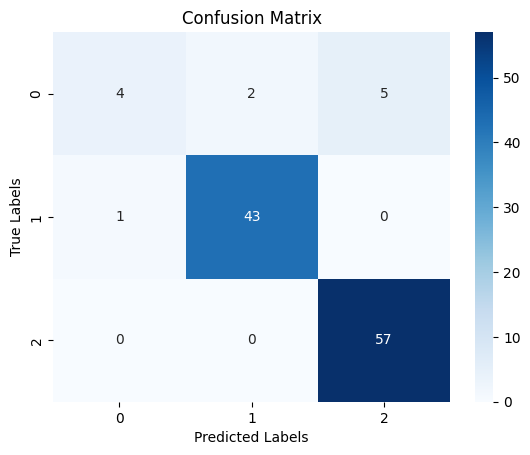

In [ ]:
accuracy = accuracy_score(y_test, y_hat_test_2)
print("Accuracy:", accuracy*100, "%")

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_hat_test_2)
# print("Confusion Matrix:")
# print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
le1.inverse_transform([0,1,2])

array(['Converted', 'Demented', 'Nondemented'], dtype=object)

Now we will save both these models

In [ ]:
import pickle
filename = "randomforest.sav"
pickle.dump(model,open(filename,"wb"))

In [ ]:
filename = "xgboost.sav"
pickle.dump(model2, open(filename, "wb"))

TypeError: ignored